In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357258 sha256=a99668054bfc256ee568b551d58703dce6465791c30ebba35f21a5c986537bac
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Descargar el dataset MovieLens 1M
!curl -o dataset.zip "https://files.grouplens.org/datasets/movielens/ml-1m.zip"
!unzip dataset.zip
!ls -la


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5778k  100 5778k    0     0  9850k      0 --:--:-- --:--:-- --:--:-- 9861k
Archive:  dataset.zip
replace ml-1m/movies.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: total 5800
drwxr-xr-x 1 root root    4096 Oct 29 00:28 .
drwxr-xr-x 1 root root    4096 Oct 29 00:27 ..
drwxr-xr-x 4 root root    4096 Oct 25 13:20 .config
-rw-r--r-- 1 root root 5917549 Oct 29 00:30 dataset.zip
drwxr-x--- 2 root root    4096 Jan 29  2016 ml-1m
drwxr-xr-x 1 root root    4096 Oct 25 13:20 sample_data


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

In [24]:

# Cargar los datasets de calificaciones y películas
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, engine='python',
                      names=['userId', 'movieId', 'rating', 'timestamp'], encoding='latin-1')
movies  = pd.read_csv('ml-1m/movies.dat', sep='::',  header=None, engine='python',
                      names=['movieId', 'title', 'genres'], encoding='latin-1')

In [13]:
ratings

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [25]:

# Unir los datasets en base a 'movieId' para agregar los títulos
user_item_rating = pd.merge(ratings, movies[['movieId', 'title']], on='movieId')

# Seleccionar solo las columnas necesarias
user_item_rating = user_item_rating[['userId', 'title', 'rating']]

# Ordenar los datos por 'userId'
user_item_rating.sort_values(by='userId', inplace=True)

# Mostrar las primeras filas para verificar
user_item_rating.head()


,userId,title,rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
29,1,"Close Shave, A (1995)",3
30,1,Antz (1998),4
31,1,"Girl, Interrupted (1999)",4
32,1,Hercules (1997),4


In [26]:

print(f"El dataset tiene {user_item_rating.shape[0]} calificaciones.")

El dataset tiene 1000209 calificaciones.


In [27]:
num_users = ratings['userId'].nunique()
print(f"Hay {num_users} usuarios únicos.")

num_movies = ratings['movieId'].nunique()
print(f"Hay {num_movies} películas únicas.")


Hay 6040 usuarios únicos.
Hay 3706 películas únicas.


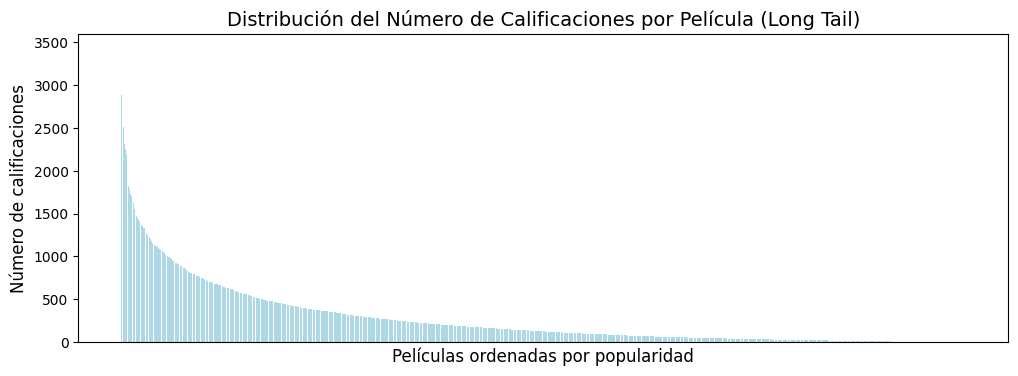

In [28]:


item_rating_counts = user_item_rating['title'].value_counts()

plt.figure(figsize=(12, 4))
plt.bar(range(len(item_rating_counts)), item_rating_counts, color='lightblue')
plt.title('Distribución del Número de Calificaciones por Película (Long Tail)', fontsize=14)
plt.xlabel('Películas ordenadas por popularidad', fontsize=12)
plt.ylabel('Número de calificaciones', fontsize=12)
plt.xticks([], [])
plt.show()


# Ejercicio 1

KNN en recomendaciones de peliculas encuentra los usuarios o peliculas mass similares a un usuario objetivo usando métricas de similitud (como la correlación de pearson o la distancia coseno). Sugiere películas que estos vecinos han calificado bien.

**Ventajas**


*   simplicidad: facil de implementar y entender.
*    al centrarse en usuarios con preferencias similares, KNN permite recomendaciones personalizadas y relevantes sin necesidad de grandes ajustes o preentrenamiento.

**Limitaciones**

*   Escalabilidad: es lento en grandes volúmenes de datos, ya que requiere comparar todos los pares posibles.

*   KNN depende de la existencia de datos comunes entre usuarios para encontrar vecinos. En sistemas con usuarios que han calificado pocas películas, el algoritmo puede tener dificultades para encontrar vecinos significativos, lo que limita su capacidad de recomendación.

# Ejercicio 2

In [29]:
import pandas as pd
import numpy as np
import random

user_ratings_count = user_item_rating.groupby('userId').size()
users_with_5_ratings = user_ratings_count[user_ratings_count >= 5].index

selected_users = random.sample(list(users_with_5_ratings), 2)
user1_ratings = user_item_rating[user_item_rating['userId'] == selected_users[0]]
user2_ratings = user_item_rating[user_item_rating['userId'] == selected_users[1]]

common_movies = pd.merge(user1_ratings, user2_ratings, on='title', suffixes=('_user1', '_user2'))
if not common_movies.empty:
    correlation = common_movies['rating_user1'].corr(common_movies['rating_user2'])
else:
    correlation = np.nan

print(f"Correlación de Pearson entre el usuario {selected_users[0]} y el usuario {selected_users[1]}: {correlation}")


Correlación de Pearson entre el usuario 3944 y el usuario 5077: 0.21570756245740777


la correlación de Pearson de 0.2157 entre el usuario 3944 y el usuario 5077 indica una relación positiva leve en sus patrones de calificación de películas,en un sistema de recomendación de peliculas, este valor sugiere que los dos usuarios tienen algunas preferencias comunes, pero no lo suficiente como para considerarse muy similares.

# Ejercicio 3

In [31]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

user_item_rating = pd.merge(ratings, movies[['movieId', 'title']], on='movieId')
user_item_rating = user_item_rating[['userId', 'movieId', 'title', 'rating']]

movie_ratings_count = user_item_rating.groupby('movieId').size()
movies_with_50_ratings = movie_ratings_count[movie_ratings_count >= 50].index
selected_movie_id = random.choice(movies_with_50_ratings)

all_movie_ids = set(user_item_rating['movieId'].unique())
other_movie_ids = list(all_movie_ids - {selected_movie_id})
movie1_id, movie2_id = random.sample(other_movie_ids, 2)

movie_ratings_pivot = user_item_rating.pivot(index='userId', columns='movieId', values='rating').fillna(0)

selected_movie_ratings = movie_ratings_pivot[selected_movie_id].values.reshape(1, -1)
movie1_ratings = movie_ratings_pivot[movie1_id].values.reshape(1, -1)
movie2_ratings = movie_ratings_pivot[movie2_id].values.reshape(1, -1)

similarity_with_movie1 = cosine_similarity(selected_movie_ratings, movie1_ratings)[0][0]
similarity_with_movie2 = cosine_similarity(selected_movie_ratings, movie2_ratings)[0][0]

selected_movie_title = movies[movies['movieId'] == selected_movie_id]['title'].values[0]
movie1_title = movies[movies['movieId'] == movie1_id]['title'].values[0]
movie2_title = movies[movies['movieId'] == movie2_id]['title'].values[0]

print(f"Película seleccionada: {selected_movie_title}")
print(f"Similitud de coseno con '{movie1_title}': {similarity_with_movie1}")
print(f"Similitud de coseno con '{movie2_title}': {similarity_with_movie2}")


Película seleccionada: Impostors, The (1998)
Similitud de coseno con 'Clear and Present Danger (1994)': 0.10372377757862551
Similitud de coseno con 'Stiff Upper Lips (1998)': 0.024128981157907962


la similitud de coseno indica qué tan parecidas son las películas en base a las calificaciones. clear and present danger tiene una mayor similitud (0.1037) con impostors que stif upper lips  (0.0241), lo que sugiere que es más probable que guste a quienes disfrutaron de impostors.

Para recomendaciones, se seleccionan películas con la similitud más alta. Este enfoque prioriza sugerencias basadas en los gustos previos del usuario, recomendando películas con perfiles de calificación similares.

# Ejercicio 4

antes de dividir el dato , se va a filtrar el dataset segun lo explicado en clase

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Cargar los datos
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, engine='python',
                      names=['userId', 'movieId', 'rating', 'timestamp'], encoding='latin-1')

# Crear la tabla de usuario-película para el sistema de recomendación
user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

################################################################3
# Establecer el mínimo de calificaciones por película
min_ratings_per_movie = 5

# Filtrar las películas con al menos min_ratings_per_movie calificaciones
movie_counts = user_item_rating['title'].value_counts()
popular_movies = movie_counts[movie_counts >= min_ratings_per_movie].index

# Filtrar el dataset original
filtered_data = user_item_rating[user_item_rating['title'].isin(popular_movies)]
filtered_data.head()

########################################################################


,userId,movieId,title,rating
0,1,1193,One Flew Over the Cuckoo's Nest (1975),5
1,1,661,James and the Giant Peach (1996),3
2,1,914,My Fair Lady (1964),3
3,1,3408,Erin Brockovich (2000),4
4,1,2355,"Bug's Life, A (1998)",5


In [34]:
# Número de películas únicas después del filtrado
num_filtered_movies = filtered_data['title'].nunique()
print(f"Después del filtrado, hay {num_filtered_movies} películas.")

Después del filtrado, hay 3416 películas.


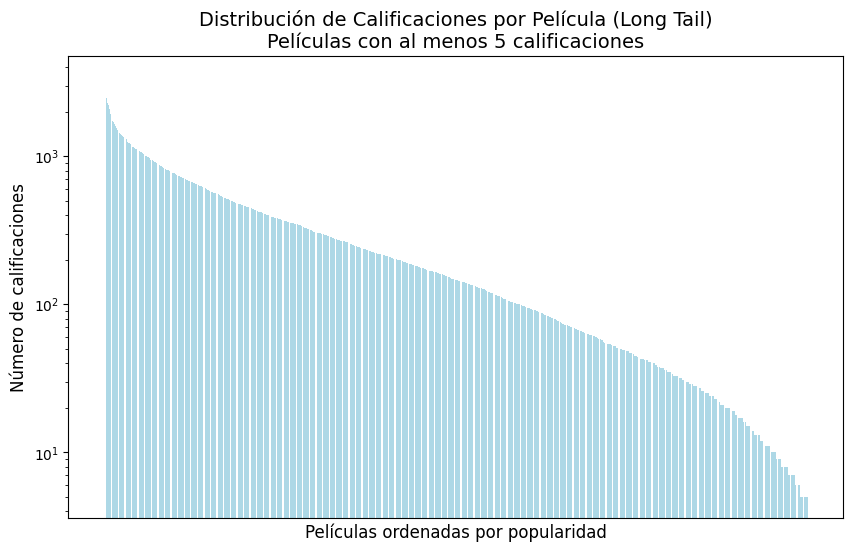

In [35]:

# Contar calificaciones por película en datos filtrados
filtered_movie_rating_counts = filtered_data['title'].value_counts()

# Gráfico de barras para visualizar el long tail filtrado
plt.figure(figsize=(10, 6))
plt.bar(range(len(filtered_movie_rating_counts)), filtered_movie_rating_counts, color='lightblue')
plt.title(f'Distribución de Calificaciones por Película (Long Tail)\nPelículas con al menos {min_ratings_per_movie} calificaciones', fontsize=14)
plt.xlabel('Películas ordenadas por popularidad', fontsize=12)
plt.ylabel('Número de calificaciones', fontsize=12)
plt.yscale('log')
plt.xticks([], [])
plt.show()



In [36]:
user_item_matrix = filtered_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

#################################################################
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# Convertir los conjuntos en matrices
train_matrix = train_data.to_numpy()
test_matrix = test_data.to_numpy()

# Entrenar el modelo KNN usando distancia euclidiana
knn = NearestNeighbors(metric='euclidean', algorithm='auto')
knn.fit(train_matrix)

#################################################################
hit_count = 0
total_recommendations = 0

for test_user_idx, test_user in enumerate(test_matrix):
    distances, indices = knn.kneighbors([test_user], n_neighbors=5)

    for idx in indices[0]:
        recommended_user_ratings = train_matrix[idx]

        recommended_movies = np.where(recommended_user_ratings > 0)[0]

        user_rated_movies = np.where(test_user > 0)[0]
        hit = len(set(recommended_movies).intersection(set(user_rated_movies))) > 0
        if hit:
            hit_count += 1

        total_recommendations += 1

hit_rate = hit_count / total_recommendations
print(f" KNN hit: {hit_rate}")

Hit Rate del modelo KNN: 0.9728476821192052


este Hit Rate tan alto indica que el modelo está bien ajustado a las preferencias conocidas de los usuarios. Sin embargo, sería útil observar otros indicadores (como precisión o diversidad de recomendaciones) para asegurarnos de que el sistema no se esté limitando a sugerir solo opciones que el usuario ya conoce, sino que también pueda descubrir nuevas recomendaciones relevantes